In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm

In [2]:
def plot_residuals(x, y, title):
    residual_plot = sns.residplot(
        x=x, 
        y=y, 
        lowess=True,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    residual_plot.set(
        title=title,
        xlabel='Predicted MPG',
        ylabel='Residuals'
    )
    x_lower, x_upper = x.min() - 2, x.max() + 2
    plt.xlim(x_lower, x_upper)
    plt.show()

In [3]:
sns.set_style('whitegrid')

In [4]:
auto_data = pd.read_csv('../data/auto.csv')

In [5]:
X = auto_data['horsepower'].to_numpy()
X = np.column_stack((X, X**2)) # add squared horsepower
X = sm.add_constant(X)
y = auto_data['mpg'].to_numpy()

In [6]:
residuals = []
predicted_values = []
for i in range(2, 4):
    linear_model = sm.OLS(endog=y, exog=X[:, :i])
    results = linear_model.fit()

    predicted_values.append(results.fittedvalues)
    residuals.append(results.resid)

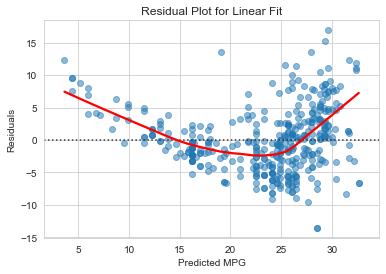

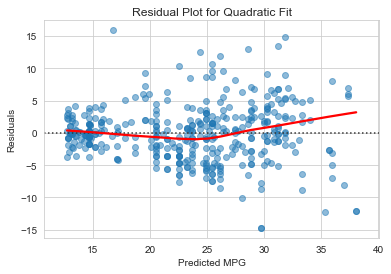

In [7]:
# Fitted / predicted values vs resid for multiple regression
plot_residuals(
    x=predicted_values[0], 
    y=residuals[0], 
    title='Residual Plot for Linear Fit'
)

plot_residuals(
    x=predicted_values[1], 
    y=residuals[1], 
    title='Residual Plot for Quadratic Fit'
)

- lack of pattern may indicate better fit
- strong pattern indicates non-linearity
- apply non-linear transformations to data e.g. log X, $\sqrt{X}$ and $X^{2}$,